In [1]:
import joblib
import math
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

In [2]:
%%time
jpd = joblib.load('jets_x1x2_w.data')

CPU times: user 106 ms, sys: 27.6 ms, total: 133 ms
Wall time: 162 ms


,pt,eta,x1,x2,id1,id2,pthat,Q2r,Q2f
count,106753.000000,106753.000000,106753.000000,106753.000000,106753.000000,106753.000000,106753.000000,1.067530e+05,1.067530e+05
mean,77.446961,0.000453,0.082743,0.083407,14.785495,14.661949,112.418890,2.572801e+04,2.572801e+04
std,95.582120,0.864273,0.099143,0.100405,9.372408,9.429156,114.410698,6.533378e+04,6.533378e+04
min,10.001609,-1.579895,0.000534,0.000550,-5.000000,-5.000000,7.293528,5.319555e+01,5.319555e+01
25%,20.884639,-0.715873,0.016561,0.016744,2.000000,2.000000,37.415329,1.400188e+03,1.400188e+03
50%,42.195109,-0.001694,0.044279,0.044301,21.000000,21.000000,72.663682,5.280011e+03,5.280011e+03
75%,93.680111,0.716418,0.111194,0.110630,21.000000,21.000000,144.388474,2.084803e+04,2.084803e+04
max,1343.451503,1.579897,0.902538,0.876307,21.000000,21.000000,1346.689863,1.813574e+06,1.813574e+06


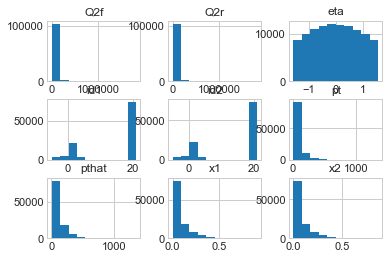

In [3]:
jpd.hist()
jpd.describe()

CPU times: user 343 ms, sys: 27.8 ms, total: 370 ms
Wall time: 380 ms


<Figure size 432x288 with 0 Axes>

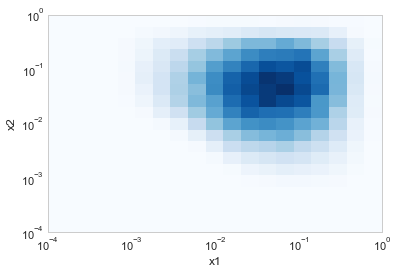

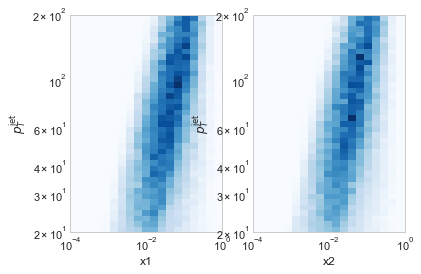

In [4]:
%%time
fig = plt.figure()
f, (ax11) = plt.subplots(1, 1)
hx1x2 = ax11.hist2d(jpd['x1'], jpd['x2'], bins=(np.logspace(np.log10(1e-4),np.log10(1.0), 20), np.logspace(np.log10(1e-4),np.log10(1.0), 20)), cmap='Blues')
ax11.set_xlabel('x1')
ax11.set_ylabel('x2')
ax11.set_xscale('log')
ax11.set_yscale('log')

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlabel('x1')
ax1.set_ylabel(r'$p_{T}^{\rm{jet}}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_yscale('log')
h1 = ax1.hist2d(jpd['x1'], jpd['pthat'], bins=(np.logspace(np.log10(1e-4),np.log10(1.0), 20), np.logspace(np.log10(20),np.log10(200), 40)), cmap='Blues')

ax2.set_xlabel('x2')
ax2.set_ylabel(r'$p_{T}^{\rm{jet}}$')
ax2.set_xscale('log')
ax2.set_yscale('log')
h2 = ax2.hist2d(jpd['x2'], jpd['pthat'], bins=(np.logspace(np.log10(1e-4),np.log10(1.0), 20), np.logspace(np.log10(20),np.log10(200), 40)), cmap='Blues')


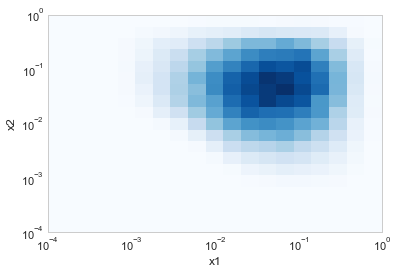

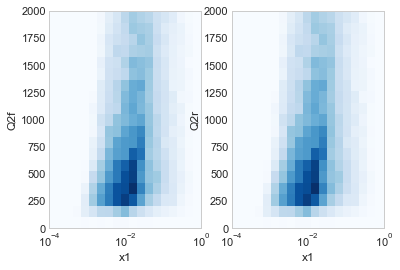

In [5]:
f, (ax11) = plt.subplots(1, 1)
ax11.set_xlabel('x1')
ax11.set_ylabel('x2')
ax11.set_xscale('log')
ax11.set_yscale('log')
hx1x2 = ax11.hist2d(jpd['x1'], jpd['x2'], bins=(np.logspace(np.log10(1e-4),np.log10(1.0), 20), np.logspace(np.log10(1e-4),np.log10(1.0), 20)), cmap='Blues')

f, (ax12, ax13) = plt.subplots(1, 2)
ax12.set_xlabel('x1')
ax12.set_ylabel('Q2f')
ax12.set_xscale('log')
hx1Q2f = ax12.hist2d(jpd['x1'], jpd['Q2f'], bins=(np.logspace(np.log10(1e-4),np.log10(1.0), 20), np.linspace(0, 2000, 20)), cmap='Blues')
ax13.set_xlabel('x1')
ax13.set_ylabel('Q2r')
ax13.set_xscale('log')
hx1Q2r = ax13.hist2d(jpd['x1'], jpd['Q2r'], bins=(np.logspace(np.log10(1e-4),np.log10(1.0), 20), np.linspace(0, 2000, 20)), cmap='Blues')

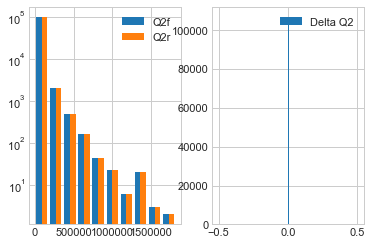

In [6]:
f, (axQ2fr, axQ2delta) = plt.subplots(1, 2)
hq2fr = axQ2fr.hist((jpd['Q2f'], jpd['Q2r']), bins = 10, label = ['Q2f', 'Q2r'])
axQ2fr.set_yscale('log')
axQ2fr.legend()
jpd['Qdiff'] = jpd['Q2f'] - jpd['Q2r']
hq2fq2r = axQ2delta.hist(jpd['Qdiff'], bins = 100, label = "Delta Q2")
axQ2delta.legend()

In [7]:
high_x_jpd = jpd.loc[(jpd['x1'] > 0.01) & (jpd['x2'] > 0.01)]

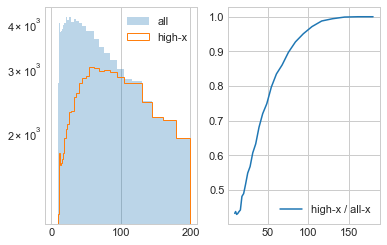

In [8]:
f, (ptx, ptxratio) = plt.subplots(1, 2)
nptxall, b, ax = ptx.hist(jpd['pt'], bins=np.logspace(np.log10(1),np.log10(200), 50), alpha=0.3, label='all')
nptxhi, b, ax = ptx.hist(high_x_jpd['pt'], bins=np.logspace(np.log10(1),np.log10(200), 50), alpha=1.0, histtype='step', label='high-x')
ptx.set_yscale('log')
ptx.legend()

np.seterr(divide='ignore', invalid='ignore') # for division by zero...

ptxratio.plot(b[:-1], nptxhi/nptxall)
ptxratio.legend(labels=['high-x / all-x'])


In [9]:
ff = jpd
gg = jpd.loc[(jpd['id1'] == 21) & (jpd['id2'] == 21)]
qg = jpd.loc[(jpd['id1'] != 21) & (jpd['id2'] == 21)]
gq = jpd.loc[(jpd['id1'] == 21) & (jpd['id2'] != 21)]
qq = jpd.loc[(jpd['id1'] != 21) & (jpd['id2'] != 21)]

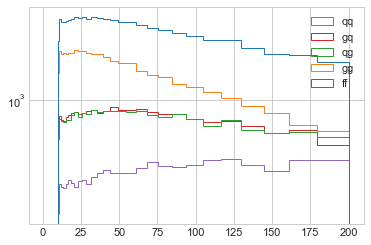

In [11]:
b, x, ax = plt.hist([ff['pt'], gg['pt'], qg['pt'], gq['pt'], qq['pt']], 
                    bins=np.logspace(np.log10(1),np.log10(200), 50), 
                    alpha=1.0, histtype='step', label = ['ff', 'gg', 'qg', 'gq', 'qq'])
plt.yscale('log')
plt.legend()

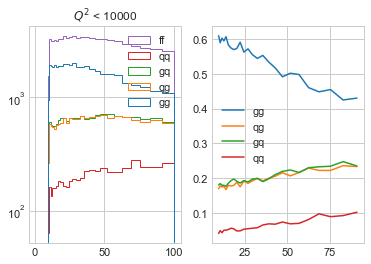

In [12]:
f, (aff1, aff2) = plt.subplots(1, 2)

jpdlq2 = jpd.loc[(jpd['Q2f'] < 50000)]
fflq2 = jpdlq2
gglq2 = jpdlq2.loc[(jpdlq2['id1'] == 21) & (jpdlq2['id2'] == 21)]
qglq2 = jpdlq2.loc[(jpdlq2['id1'] != 21) & (jpdlq2['id2'] == 21)]
gqlq2 = jpdlq2.loc[(jpdlq2['id1'] == 21) & (jpdlq2['id2'] != 21)]
qqlq2 = jpdlq2.loc[(jpdlq2['id1'] != 21) & (jpdlq2['id2'] != 21)]

naff1, b, p = aff1.hist([gglq2['pt'], qglq2['pt'], gqlq2['pt'], qqlq2['pt'], fflq2['pt']], 
                        bins=np.logspace(np.log10(1),np.log10(100), 50), 
                        alpha=1.0, histtype='step', label = ['gg', 'qg', 'gq', 'qq', 'ff'])
aff1.set_title(r'$Q^{2}$ < 10000')
aff1.set_yscale('log')

aff2.plot(b[:-1], naff1[0]/naff1[4])
aff2.plot(b[:-1], naff1[1]/naff1[4])
aff2.plot(b[:-1], naff1[2]/naff1[4])
aff2.plot(b[:-1], naff1[3]/naff1[4])

aff1.legend()
aff2.legend(labels=['gg', 'qg', 'gq', 'qq'])



Text(0.5, 1.0, '$p_{T}^{\\rm{jet}}$ vs. $Q^{2}$')

<Figure size 432x288 with 0 Axes>

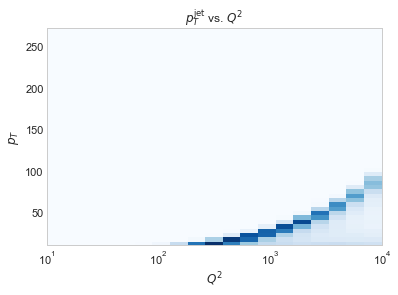

In [13]:
fig = plt.figure()
f, (aq2pt) = plt.subplots(1, 1)
hq2pt = aq2pt.hist2d(jpdlq2['Q2f'], jpdlq2['pt'], 
                    bins=(np.logspace(np.log10(10),np.log10(10000), 20), 50), cmap='Blues')
aq2pt.set_xlabel(r'$Q^2$')
aq2pt.set_ylabel(r'$p_{T}$')
aq2pt.set_xscale('log')
# aq2pt.set_yscale('log')
aq2pt.set_title(r'$p_{T}^{\rm{jet}}$ vs. $Q^{2}$')